In [148]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from skimage.filters import threshold_yen
from skimage.exposure import rescale_intensity
from skimage.io import imread, imsave
from skimage.feature import blob_dog, blob_log, blob_doh
import skimage.feature as feat

[[297.         116.           1.22222222]
 [268.         148.           1.22222222]
 [201.         360.           1.22222222]
 [372.         350.           1.22222222]
 [153.         363.           1.88888889]
 [304.         319.           1.88888889]
 [215.         274.           1.88888889]
 [321.         176.           1.88888889]
 [343.         242.           1.88888889]
 [386.         243.           1.88888889]
 [231.         133.           1.88888889]
 [134.         229.           1.88888889]
 [283.         176.           1.88888889]
 [333.         201.           1.88888889]
 [133.         180.           1.88888889]
 [170.         163.           1.88888889]
 [280.         133.           1.88888889]
 [354.         247.           1.88888889]
 [334.         153.           2.33333333]
 [152.         234.           1.88888889]
 [214.         166.           2.11111111]
 [353.         306.           1.88888889]
 [187.         185.           1.88888889]
 [257.         233.           2.33

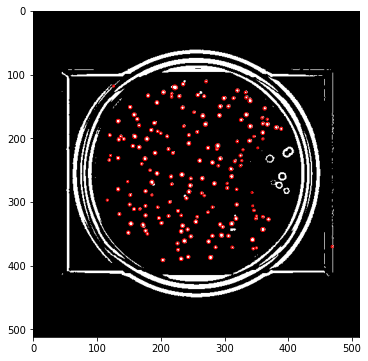

In [150]:
image = 'synth/synth1.png'
img = cv2.imread(image, 1)
img_orig = img.copy()

crop = img
# crop = img[100:1600,150:2450]
# cv2.addWeighted(crop, 1000, crop, 0, 1000)
gray = cv2.cvtColor(crop,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 1)
invert = cv2.bitwise_not(blur)

# thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
thresh2 = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,2)

# cnts = cv2.findContours(invert, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# cnts = cnts[0] if len(cnts) == 2 else cnts[1]
# cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[0])
# for c in cnts:
#     x, y, w, h = cv2.boundingRect(c)
#     cv2.rectangle(invert, (x,y), (x+w,y+h), (36,255,12), 2)

blobs2 = blob_log(thresh2, min_sigma=1, max_sigma=3, threshold=0.6, exclude_border=True)
fig, ax = plt.subplots(figsize=(6,6))
print(blobs2)
# ax.imshow(thresh2)
for blob in blobs2:
    y, x, area = blob
    ax.add_patch(plt.Circle((x, y), area*np.sqrt(2), 
                 color='r', fill=False))

plt.imshow(thresh2, cmap='gray')

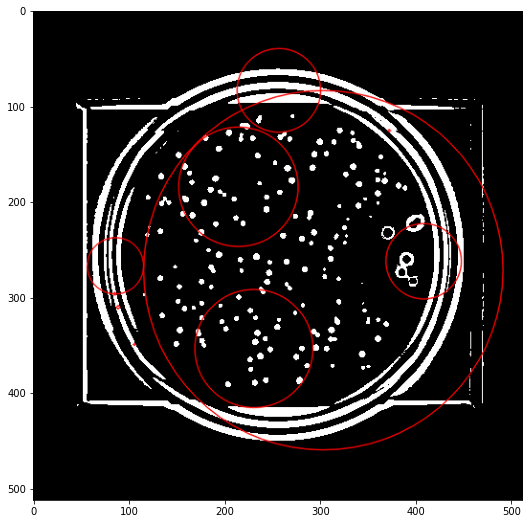

In [94]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 1;
params.maxThreshold = 9000;

params.filterByArea = False
params.minArea = 1
params.maxArea = 500

params.filterByCircularity = False
params.minCircularity = 0.1

params.filterByConvexity = False
params.minConvexity = 0.87

params.filterByInertia = False
params.minInertiaRatio = 0.1

detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(invert)
blobs = cv2.drawKeypoints(thresh2, keypoints, np.array([]), (255,0,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(blobs)
# print(keypoints[0].pt)
# plt.imsave('detected/detected8.jpg', blobs)

In [85]:
all_circs = cv2.HoughCircles(thresh2, cv2.HOUGH_GRADIENT, 1, 50, param1=20, param2=20, minRadius=0, maxRadius=20)
all_circs_rounded = np.uint16(np.around(all_circs1))

In [86]:

print(all_circs_rounded)
print(all_circs_rounded.shape)
print('there are' + str(all_circs_rounded.shape[1]) + 'circles')

[[[328 322  97]
  [178 312  97]
  [148 188  97]
  [272 152  86]
  [402 172  70]
  [512 278  97]
  [438 372  36]
  [362  22  92]
  [ 12 152  97]
  [ 12 332  92]
  [378 482  92]]]
(1, 11, 3)
there are11circles


In [87]:
count = 1
for i in all_circs_rounded[0, :]:
    cv2.circle(crop, (i[0],i[1]), i[2], (36,255,12), 2)
    count += 1

# count = 1
# for i in all_circs_rounded2[0, :]:
#     cv2.circle(crop, (i[0],i[1]), i[2], (36,255,12), 2)
#     count += 1

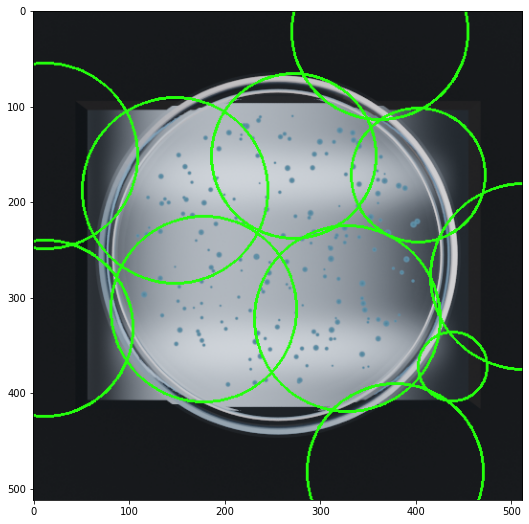

In [89]:
plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(crop)